In [1]:
import pandas as pd
import numpy as np
from qdatasdk import *
import matplotlib.pyplot as plt
from MyModel import Model1, Model2, DataCleaner
from stability import IfR1Positive
# 定义结果
Model1_R2=[]
Model1_beta=[]
Model1_alpha=[]
Model2_R2=[]
Model2_beta_1=[]
Model2_beta_7=[]
Model2_alpha=[]
r1_positive_model1R2=[]
r1_negative_model1R2=[]
r1_positive_model2R2=[]
r1_negative_model2R2=[]

In [2]:
# 加载parameters
security=get_all_securities().index.tolist()
start_date=["2021-01-01","2022-01-01","2023-01-01"]
end_date=["2021-12-31","2022-12-31","2023-12-31"]
security=security[0:460]
cnt=0
success_cnt=0
fail_cnt=0
for i in security:
    df1 = get_bars(security=str(i), start_date=start_date[0], end_date=end_date[0], unit="1m",type="stock")
    if df1 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df2 = get_bars(security=str(i), start_date=start_date[1], end_date=end_date[1], unit="1m",type="stock")
    if df2 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df3 = get_bars(security=str(i), start_date=start_date[2], end_date=end_date[2], unit="1m",type="stock")
    if df3 is None:
        print(f"数据获取失败: {str(i)}")
        continue
    df=pd.concat([df1,df2,df3],axis=0)
    df = df.reset_index().rename(columns={'index': 'date'})
    dataCleaner=DataCleaner(df)
    dataCleaner.clean()
    r1=dataCleaner.getR1()
    r7=dataCleaner.getR7()
    r8=dataCleaner.getR8()
    IfR1Positive_ex=IfR1Positive(r1,r7,r8)
    IfR1Positive_ex.fit()
    
    model1_positive_R2,model2_positive_R2,model1_negative_R2,model2_negative_R2=IfR1Positive_ex.getResult()
    r1_positive_model1R2.append(model1_positive_R2)
    r1_negative_model1R2.append(model1_negative_R2)
    r1_positive_model2R2.append(model2_positive_R2)
    r1_negative_model2R2.append(model2_negative_R2)
    
    if(IfR1Positive_ex.Fail()):
        fail_cnt+=1
    if(IfR1Positive_ex.Success()):
        success_cnt+=1
    cnt+=1
    print("\r Progress:{}/{}      \n".format(cnt,len(security)),end="")
print("完全不符合研报预测的结果比率为：",fail_cnt/cnt)
print("完全符合研报预测的结果比率为：",success_cnt/cnt)

当r1为正时，两个模型的R^2分别为: 0.0006290692994134206 0.016197890584844887
当r1为负时，两个模型的R^2分别为: 1.4345140368021703e-05 0.024387137300568518
 Progress:1/460      
当r1为正时，两个模型的R^2分别为: 0.0010581775209889122 0.02629758902013446
当r1为负时，两个模型的R^2分别为: 0.011963866695519187 0.012230002040454324
 Progress:2/460      
当r1为正时，两个模型的R^2分别为: 3.3794163588840576e-05 9.674865073916461e-05
当r1为负时，两个模型的R^2分别为: 0.0007242179907227531 0.0013435247710037457
 Progress:3/460      
当r1为正时，两个模型的R^2分别为: 0.0056070247515055405 0.07767238269998111
当r1为负时，两个模型的R^2分别为: 0.011500341482703957 0.0879228412089974
 Progress:4/460      
当r1为正时，两个模型的R^2分别为: 0.02485398295302277 0.03174680382047679
当r1为负时，两个模型的R^2分别为: 0.01526671308745653 0.042783559496545
 Progress:5/460      
当r1为正时，两个模型的R^2分别为: 0.006022589692884384 0.03729087113566898
当r1为负时，两个模型的R^2分别为: 0.004510946756848155 0.004509615301621528
 Progress:6/460      
当r1为正时，两个模型的R^2分别为: 7.786259299757958e-05 8.742167488151598e-05
当r1为负时，两个模型的R^2分别为: 0.07534329044838484 0.11309177161677897
 

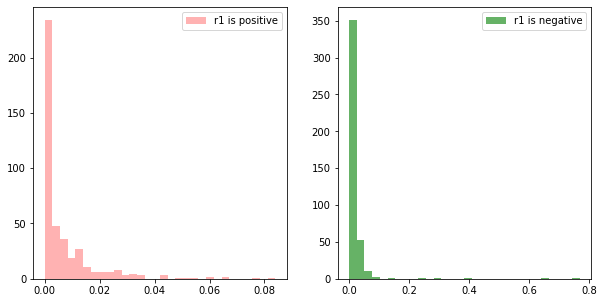

In [25]:
#画图 model1
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(r1_positive_model1R2,bins=30,alpha=0.3,label='r1 is positive',color='red')
axs[1].hist(r1_negative_model1R2,bins=30,alpha=0.6,label='r1 is negative',color='green')
axs[0].legend()
axs[1].legend()
plt.show()

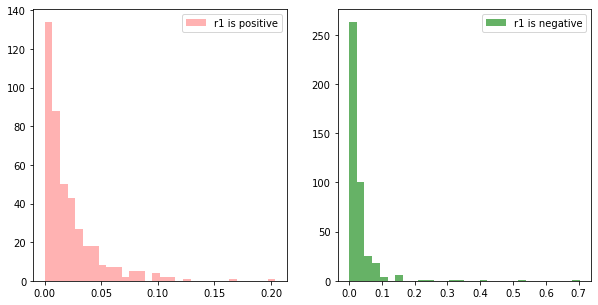

In [26]:
#画图 model2
#plt.hist(r1_positive_model2R2,bins=30,alpha=0.3,label='r1 is positive',color='red')
fig,axs=plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(r1_positive_model2R2,bins=30,alpha=0.3,label='r1 is positive',color='red')
axs[1].hist(r1_negative_model2R2,bins=30,alpha=0.6,label='r1 is negative',color='green')
axs[0].legend()
axs[1].legend()
plt.show()